# MALIS Lab Session 2 - Fall 2021
## Due Date: Dec 3 23h59

**Group :** **GG**

**Federico GERMINARIO, Andrea GHIGLIONE**

The aim of this lab is to practice with Neural Networks (Multi-Layer Perceptrons) via simple classification experiments and the implementation of the feedforward and backpropagation procedures.

#### Learning goals
After this lab, you should be able to:
1. Be familiar with the elements required to define the architecture of a neural network (NN).
2. Understand the two procedures needed to train a neural network: feedforward and backpropagation
3. Understand the role of the learning rate and the number of iterations in the training process of a NN and how it these can affect performance.

#### Instructions:
Experiments should be made by groups of two students. Each group should produce a Jupyter Notebook with all their results and comments. We strongly encourage the addition of plots and visual representation to the report, bearing in mind that comments on the graphical data are still necessary. Code for adding images to your notebook: ```<img src="path/to/image.png" />```. <Plateforme soumission des notebooks>

<h2>Introduction</h2>
There are three parts to this lab session. 

1. A "theoretical" part: Given a set of training examples you have to decide on the architecture of the feed-forward neural network such as; number of layers, number of neuron per layers and finally the values of the weights. 

2. A "programming" part: Given the skeleton of the Python code of an MLP simulator, implement the missing functions (feedforward and backpropagation procedures). 

3. An "experimental" part: Having completed the implementation of the MLP simulator, the final step consist on training the network and testing it.

<h2>Part 1: Design a neural network</h2>
The aim of this part is to get a better understanding of the basics of Neural Networks construction. A number of sample points on a 128 by 128 grid have been assigned one out of three colors (red, green or blue). You should build a Neural Network with two inputs and three outputs which provides the exact coloring for these points. The problem can be visualized in the following figure: 

<img src="data_set.jpg" />

The file set30.x1x2rgb (in .\data\) contains the data corresponding to the problem defined above. The visual representation of the problem (above figure) is stored in data_set.jpg.

The problem:

Pairs of x1 and x2 coordinates (both ranging between 0 and 127) are associated with a specific color: 

* Red: output 1 0 0, 
* Green: output 0 1 0, 
* Blue: output 0 0 1. 

**Question :** How many linear separations would be needed to perfectly separate the data points? Using the visual representation, give some appropriate equations of such linear separations.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

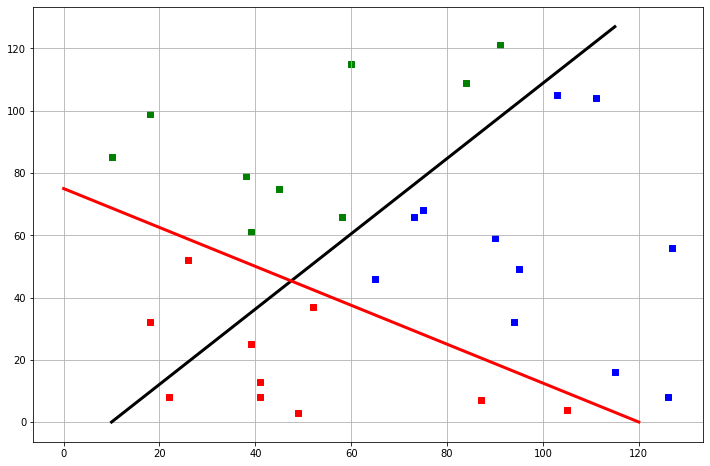

In [3]:
points_df = pd.read_csv("colors.csv")
color_points_df = points_df.copy()
color_points_df["color"] = color_points_df[["y1","y2","y3"]].idxmax(axis=1)
color_points_df.drop(columns=["y1","y2","y3"],inplace=True)
color_points_df["color"] = color_points_df["color"].apply(lambda color : "red" if color=="y1" else "green" if color=="y2" else "blue")
plt.figure(figsize=(12,8))
plt.scatter(data=color_points_df, x="x1",y="x2",color="color",marker="s")
x1_gb = [10, 115]
x2_gb = [0, 127]
x1_r = [0, 120]
x2_r = [75, 0]
plt.plot(x1_gb, x2_gb, color="black", linewidth=3)
plt.plot(x1_r, x2_r, color="red", linewidth=3)
plt.grid()
plt.show()

**Answer :** 2 linear separators would be needed. From the image we can see that we can easily draw two different lines to separate the different points based on their class. 
In fact if we take a line passing for the points A(x1=0, x2=75) and B(x1=120, x2=0) we can draw a line with which we can separate the red dots from the others, with the equation y_red = -0.625x + 75 
With a second line (black line in the image) instead we can easily separate the remaining green and blue points from each other, 
this line pass throught the points C(X1=10, x2=0) and D(x1=115, x2=127) which results in the equation y_black = 1.2x -12.095.
With the combination of the two lines we can easily see the total separation of the different classes.

The objective of the network is to correctly determine for any given (x1, x2) coordinate pair the corresponding color. 
Using the equations you proposed before, along with your lectures knowledge, your task is to <b>manually define a Neural Network which performs this task perfectly</b>. There is no need for programming or iterative training. The transfer function is assumed to be the step function: 

$f(t) = (t > 0)$ (it is equal to 1 if t is positive, 0 otherwise). 

Of course, it is your task to define the number of layers, the number of neurons per layer, and the exact values for the weights. 

<i>Hint: We may remember the XOR problem and how it was solved. Think also how many lines you need to create areas with only elements of that color and if the color is below or above that color.</i>

### Your answer :

( *Fill in the correct data and fill the respective weigths and biases* )

#### Test with the data
Test with the data in ./data/set30.x1x2rgb, complete the code below with your values

In [4]:
import numpy as np
from sklearn.model_selection import train_test_split
print_solutions=False

In [5]:
rgb_df=pd.read_csv('colors.csv')

x=np.array(rgb_df[['x1','x2']].copy())
y=np.array(rgb_df[['y1','y2','y3']].copy())

######################### YOUR VALUES HERE ####################

# weight input -> 1st hidden layer
W_1 =np.array([[-0.625,-1], # to n1 of first hidden layer
      [-1.2, 1], # to n2 of first hidden layer
                 ])
# bias 1st hidden layer
b_1 = np.array([75,12.095]).T 


# nth hidden layer -> output layer
W_out =np.array([[1,0], # to n1 of first hidden layer
      [-1,1], # to n2 of first hidden layer
      [-1,-1]])
b_out = np.array([-0.5, -0.5, 0.5]).T 


x1 = (b_1 + x @ W_1.T)>0 # @ is the matrix product

y_hat = (b_out + x1 @ W_out.T)>0

######################### END YOUR VALUES ######################

# You should get 100 %
print('accuracy : ' , 100*np.sum(y_hat==y)/(3*len(y)),'%')



accuracy :  100.0 %


In [6]:
# do NOT modify this cell
if print_solutions==True :
    %load ./solutions/part1.py

## Part 2: Implementation of a Neural Network / Multi-Layer Perceptrons

In order to implement a neural network, firstly we have to implement the basic blocks, then combine them.

1. **Initialization of parameters**
    1. need as parameters the number of neurons in input, hidden layer1, hidden layer2, ..., output
    2. random initialization of the parameters
2. **Activation functions**
    1. define the function sigmoid and sigmoid_derivative
2. **Forward function**
    1. using inputs, weights, activation functions compute y_hat
3. **Loss function**
    1. given as input the true y and y_hat, compute the loss
4. **Accuracy**
    1. given as input the true y and y_hat, compute the accuracy
5. **Backward function**
    1. gradient computations from last layer to first layer
    2. update of parameters (weights,...)
6. **Training**
    1. needs as parameters the inputs and corresponding outputs,the learning rate, the number of epochs and the parameter verbose
    2. repeat for the number of epochs:
        1. shuffle the inputs
        2. for each input : forward, loss, backward
        3. loss and save it and if verbose==True print it
        4. accuracy and save it and if verbose==True print it


Give a look to the file **NeuralNetwork.py** and then return to the notebook to implement the missing functions

In [7]:
import numpy as np
from scipy.stats import logistic
# from the file NeuralNetwork.py we import the Multi-Layer Perceptron
from NeuralNetwork import MLP

**2. Activation functions**

In MLP there is the function sigmoid. Using MPL.sigmoid(), implement its derivative function

In [8]:
def d_sigmoid(a) :
    '''
    Derivative of sigmoid activation function. It can work with single inputs or vectors or matrices.
    Return the sigmoid derivative of a
    '''
    ################# YOUR CODE HERE ####################
    d_sigmoid = MLP.sigmoid(a) * (1 - MLP.sigmoid(a))
    return d_sigmoid
    ################ END OF YOUR CODE HERE ##############
    
MLP.d_sigmoid=d_sigmoid

In [9]:
# do NOT modify this cell
if print_solutions==True :
    %load ./solutions/d_sigmoid.py

**3. Feedforward function**

Write a function which performs the forward operation from input to output layer. Remember you have len(self.layers) number of layers and each layer has its own parameters:
1. self.layer[0].W are the weights between input and 1st hidden layer
2. self.layer[0].b are the biases of the 1st hidden layer
3. ...

Each layer has as activation function the sigmoid function

In [10]:
def forward(self, x) :
    '''
    Forward function. From input layer to output layer. Input can handle 1D or 2D inputs.

    INPUTS:
    - x : numpy array of size NxD, where N is the number of samples, D is the number of input dimensions referred as n_input before

    OUTPUTS:
    - y_hat : numpy array of size NxC, where C is the number of classes
    '''
    ################# YOUR CODE HERE ####################
    x_part = x
    for i in range(len(self.layer)):
        x_part = MLP.sigmoid(self.layer[i].b + x_part @ self.layer[i].W.T)
        
    y_hat = x_part
    
    ################ END OF YOUR CODE HERE ##############

    return y_hat

MLP.forward=forward

In [11]:
# do NOT modify this cell
if print_solutions==True :
    %load ./solutions/forward.py

**4. Loss function**

Compute the mean square loss between y_hat and y
$$L = \frac{1}{N}\sum_{n=0}^{N-1} \left(\frac{1}{2} \sum_{k=0}^{C-1} (\hat{y}_{k,n} - y_{k,n})^2\right)$$
with $k$ be the class, and $n$ the sample

In [12]:
def loss(y_hat, y) :
    '''
    Compute the loss between y_hat and y! they can be 1D or 2D arrays!

    INPUTS:
    - y_hat : numpy array of size NxC, N number of samples, C number of classes. It contains the estimated values of y
    - y : numpy array of size NxC with one 1 in each row, corresponding to the correct class for that sample

    OUTPUTS:
    - L : MSE loss
    '''
    ################# YOUR CODE HERE ####################

    L = (np.sum((y_hat - y)**2, axis=1) * 0.5).mean()
    
    ################ END OF YOUR CODE HERE ##############

    return L

MLP.loss=loss

In [13]:
# do NOT modify this cell
if print_solutions==True :
    %load ./solutions/loss.py

**5. Accuracy**

Compute the accuracy counting how many y_hat are equal to y over the total number of N samples. Remember the accuracy is a value in [0,1]

In [14]:
def accuracy(y_hat,y) :
    '''
    Compute the accuracy between y_hat and y

    INPUTS:
    - y_hat : numpy array of size NxC, C number of classes. It contains the estimated values of y
    - y : numpy array of size NxC with correct values of y

    OUTPUTS:
    - acc : the accuracy value between 0 and 1
    '''
    ################# YOUR CODE HERE ####################
    count_corr = 0
    for i in range(len(y)):
        y_hat_bin = [0,0,0]
        pred_value_index = np.argmax(y_hat[i])
        y_hat_bin[pred_value_index] = 1
        if np.array_equiv(y[i], y_hat_bin): 
            count_corr+=1
    
    acc = count_corr / len(y)
    
    #acc = np.sum(y_hat==y)/(3*len(y))
    ################ END OF YOUR CODE HERE ##############

    return acc

MLP.accuracy=accuracy

In [15]:
# do NOT modify this cell
if print_solutions==True :
    %load ./solutions/accuracy.py

**6. Backpropagation**

You can perform it in 2 ways. The first neuron by neuron as done during the lecture, or you can use matrices as explained here. The result are equivalent. A full matrix derivation can be found here http://neuralnetworksanddeeplearning.com/chap2.html

$$\frac{\partial L}{\partial z^L}=\frac{\partial L}{\partial \hat{y}}=\delta_L=\hat{y}-y=z^L-y$$

**Important** : $\hat{y}$ and $y$ are row vectors 1$\times$C, with C the number of classes, while $a$, $z$ and $b$ are row vectors too in this notation. So are the derivatives w.r.t. them. $W^l$ is instead a matrix $n^l \times n^{l-1}$, where $n^l$ is the number of neurons at layer $l$, while  $n^{l-1}$ is the number of neurons at layer $l-1$

**Generic layer $l$**

$$\frac{\partial L}{\partial z^l}=\delta_l=\frac{\partial L}{\partial a^{l+1}}\ W^{l+1}$$

$$\frac{\partial L}{\partial a^l}=\delta_l \odot \sigma'(a^l)$$

$\odot$ is the Hadamard product or elementwise multiplication

$$\frac{\partial L}{\partial b^l}=\frac{\partial L}{\partial a^l}$$

$$\frac{\partial L}{\partial W^l}=\left(\frac{\partial L}{\partial a^l}\right)^T\ (z^{l-1})$$

with $z^{-1}$, the z at layer -1 is $x$ the input vector of size 1$\times$D, where D is the number of features

After all computations, remember to compute the update of the gradients using the learning rate $\eta$

$$W^l_{new}=W^l-\eta \frac{\partial L}{\partial W^l}$$

$$b^l_{new}=b^l-\eta \frac{\partial L}{\partial b^l}$$









In [16]:
def backpropagation(self,x,y,y_hat,learning_rate) :
    '''
    Backpropagate the error from last layer to input layer and then update the parameters

    INPUTS:
    - y_hat : numpy array of size NxC, C number of classes. It contains the estimated values of y
    -y : numpy array of size NxC with correct values of y

    OUTPUTS: (compute the error at the different levels and for each layer)
    - d_a
    - d_z
    - delta_L
    - delta_l
    - d_W
    - d_b
    '''
# compute gradients
    
    ################# YOUR CODE HERE ####################
    
    x_part = x    
    self.layer[0].z = x_part
    for i in range(len(self.layer) - 1):
        
        a = self.layer[i].b + self.layer[i].z @ self.layer[i].W.T
        self.layer[i].a = a
        self.layer[i + 1].z = MLP.sigmoid(self.layer[i].a)
    
    delta_L = (y_hat - y) 
    delta_l = delta_L
    for el in range(len(self.layer) -1, -1, -1):
        
        self.layer[el].d_a = delta_l * MLP.d_sigmoid(self.layer[el].a)
        self.layer[el].d_b = self.layer[el].d_a
        delta_l = np.dot(self.layer[el].d_a, self.layer[el].W)
        self.layer[el].d_W = np.dot(self.layer[el].d_a.T, self.layer[el].z)
    ################ END OF YOUR CODE HERE ##############

# apply gradients
    # just one for loop passing through all layers is sufficient
    # apply the gradients only to self.layer[i].b and self.layer[i].W

    ################# YOUR CODE HERE ####################
    for i in range(len(self.layer)):
        self.layer[i].W = self.layer[i].W - learning_rate * (self.layer[i].d_W)
        self.layer[i].b = self.layer[i].b - learning_rate * (self.layer[i].d_b)
    ################ END OF YOUR CODE HERE ##############
    
MLP.backpropagation=backpropagation

In [17]:
# do NOT modify this cell
if print_solutions==True :
    %load ./solutions/backpropagation.py

<h2>Part 3: Training and Recall experiments</h2>

Train the network using the iris dataset (https://en.wikipedia.org/wiki/Iris_flower_data_set)
* 4 features for every input
* 3 possible labels


In [34]:
from sklearn import datasets
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

iris = datasets.load_iris()

shuffle=np.random.permutation(range(len(iris.data)))
X = np.array(iris.data)[shuffle,:]
y = np.eye(3)[iris.target,:]
y=y[shuffle,:]

x_train=X[0:120,:]
y_train=y[0:120,:]
x_test=X[120:,:]
y_test=y[120:,:]

TRAINING
Epoch 0 : loss = 3.51226e-01, accuracy = 33.33 %
Epoch 10 : loss = 3.20308e-01, accuracy = 87.50 %
Epoch 20 : loss = 2.98059e-01, accuracy = 92.50 %
Epoch 30 : loss = 2.56294e-01, accuracy = 83.33 %
Epoch 40 : loss = 2.11632e-01, accuracy = 75.00 %
final : loss = 1.851e-01 , accuracy = 80.00 %

TEST
loss = 2.079e-01 , accuracy = 83.33 %



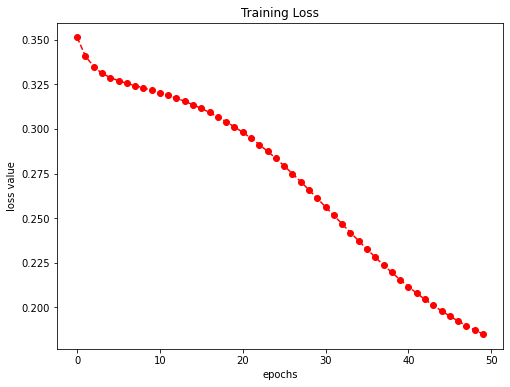

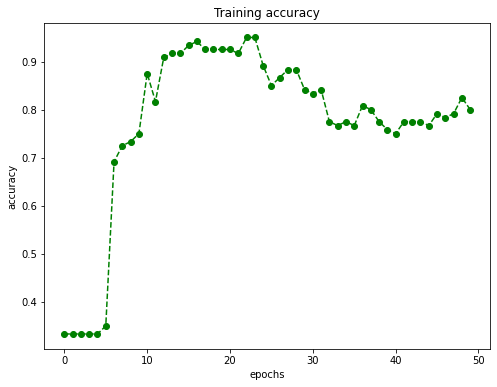

In [35]:
# Neural Network (NN) parameters
epochs=50
learning_rate=[0.01]
verbose=True
print_every_k=10

    
# Initialization of the NN
NN1 = MLP([4, 10, 3])
print('TRAINING')
# Training
NN1.training(x_train,y_train,learning_rate,epochs,verbose,print_every_k)
# Compute the training loss and accuracy after having completer the training
y_hat=NN1.forward(x_train)

print('final : loss = %.3e , accuracy = %.2f %%'%(MLP.loss(y_hat,y_train),100*MLP.accuracy(y_hat,y_train)))
    
# Test
print('\nTEST')
y_hat=NN1.forward(x_test)
print('loss = %.3e , accuracy = %.2f %%\n'%(MLP.loss(y_hat,y_test),100*MLP.accuracy(y_hat,y_test)))
plt.figure(figsize=(8,6))
plt.plot(list(range(epochs)),NN1.losses,c='r',marker='o',ls='--');
plt.title("Training Loss")
plt.xlabel("epochs")
plt.ylabel("loss value")
plt.show()

plt.figure(figsize=(8,6))
plt.plot(list(range(epochs)),NN1.accuracies,c='g',marker='o',ls='--');
plt.title("Training accuracy")
plt.xlabel("epochs")
plt.ylabel("accuracy")
plt.show()

TRAINING
Epoch 0 : loss = 3.57540e-01, accuracy = 33.33 %
Epoch 10 : loss = 3.17013e-01, accuracy = 43.33 %
Epoch 20 : loss = 2.47453e-01, accuracy = 95.83 %
Epoch 30 : loss = 1.83891e-01, accuracy = 82.50 %
Epoch 40 : loss = 1.63940e-01, accuracy = 88.33 %
Epoch 50 : loss = 1.56424e-01, accuracy = 90.83 %
Epoch 60 : loss = 1.51176e-01, accuracy = 98.33 %
Epoch 70 : loss = 1.45912e-01, accuracy = 98.33 %
Epoch 80 : loss = 1.39990e-01, accuracy = 98.33 %
Epoch 90 : loss = 1.33365e-01, accuracy = 96.67 %
Epoch 100 : loss = 1.25621e-01, accuracy = 97.50 %
Epoch 110 : loss = 1.17081e-01, accuracy = 98.33 %
Epoch 120 : loss = 1.08715e-01, accuracy = 96.67 %
Epoch 130 : loss = 9.86768e-02, accuracy = 97.50 %
Epoch 140 : loss = 8.86139e-02, accuracy = 97.50 %
Epoch 150 : loss = 8.17671e-02, accuracy = 95.83 %
Epoch 160 : loss = 7.03935e-02, accuracy = 99.17 %
Epoch 170 : loss = 6.27790e-02, accuracy = 97.50 %
Epoch 180 : loss = 5.54923e-02, accuracy = 97.50 %
Epoch 190 : loss = 4.90401e-02, a

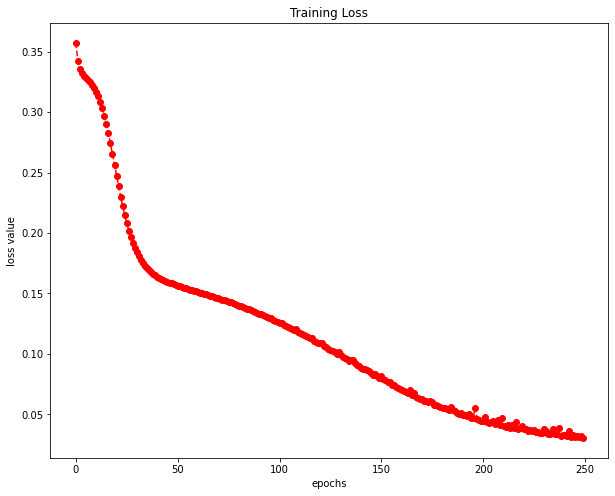

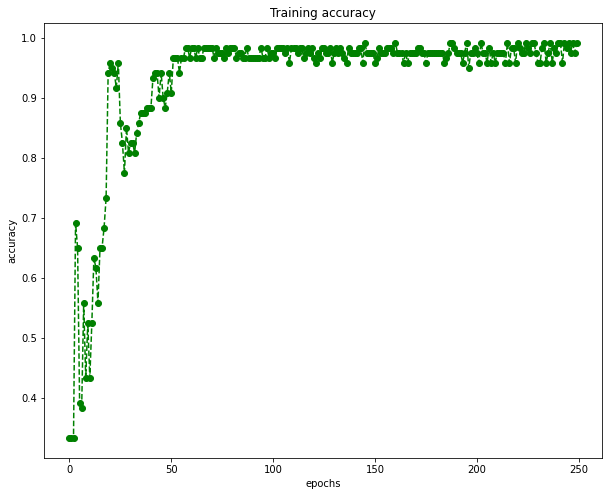

In [37]:
# Neural Network (NN) parameters
epochs=250
learning_rates=[0.02]
verbose=True
print_every_k=10
for learning_rate in learning_rates:
    
    # Initialization of the NN
    NN1 = MLP([4, 10, 3])
    print('TRAINING')
    # Training
    NN1.training(x_train,y_train,learning_rate,epochs,verbose,print_every_k)
    # Compute the training loss and accuracy after having completer the training
    y_hat=NN1.forward(x_train)

    print('final : loss = %.3e , accuracy = %.2f %%'%(MLP.loss(y_hat,y_train),100*MLP.accuracy(y_hat,y_train)))
    
    # Test
    print('\nTEST')
    y_hat=NN1.forward(x_test)
    print('loss = %.3e , accuracy = %.2f %%\n'%(MLP.loss(y_hat,y_test),100*MLP.accuracy(y_hat,y_test)))
    plt.figure(figsize=(10,8))
    plt.plot(list(range(epochs)),NN1.losses,c='r',marker='o',ls='--');
    plt.title("Training Loss")
    plt.xlabel("epochs")
    plt.ylabel("loss value")
    plt.show()

    plt.figure(figsize=(10,8))
    plt.plot(list(range(epochs)),NN1.accuracies,c='g',marker='o',ls='--');
    plt.title("Training accuracy")
    plt.xlabel("epochs")
    plt.ylabel("accuracy")
    plt.show()

Using the previous cell as example, try to change the parameters in order to obtain a training accuracy above 99% and a test accuracy above 95%.

**Explain** the difference between the new parameters and the old ones. What was missing in the old ones?

**Answer:** Altough a gridsearch could be applied to extensively determine parameters, we only setted few parameters to achieve better results with respect to the first models proposed with 50 epochs and a learning rate of 0.01.
In particular to effectively understand the best parameters it could be really useful also to have a validation set and a validation error.
In that case we can set the number of epochs to a very high number and stop once the validation error is not dropping anymore.
For the learning rate we instead set different range and look at how it behaves and once we select a precise range of interested we can change granularity and find the best one. 
We payed attention to choose a learning rate which is neither too big or too small; in this way we avoided big steps that could lead to algorithm's divergence and small steps where the algorithm would take a lot of time to converge.
With respect to the old parameters we doubled the learning rate (we are taking bigger steps) and we run for more epochs since 50 epochs (old values) ended up being not enough.